| Ichimoku Cloud |
|----------------|

Good for strong long movements.
Thicker cloud = less momentum
Thinner cloud  = more momentum

In [5]:
# libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
# from matplotlib.widgets import CheckButtons

[*********************100%***********************]  1 of 1 completed


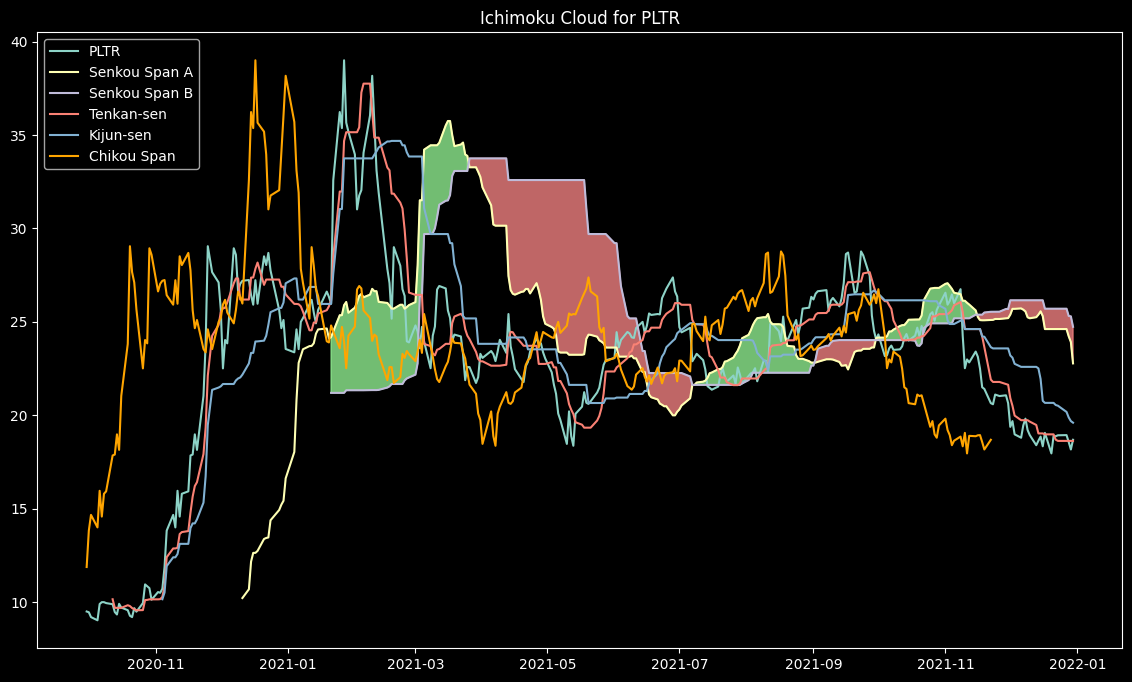

In [21]:
""" STOCK MARKETS"""

def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

def calculate_ichimoku(data):
    high_prices = data['High']
    low_prices = data['Low']
    close_prices = data['Close']

    # Ichimoku Cloud calculation
    data['Tenkan-sen'] = (high_prices.rolling(window=9).max() + low_prices.rolling(window=9).min()) / 2
    data['Kijun-sen'] = (high_prices.rolling(window=26).max() + low_prices.rolling(window=26).min()) / 2
    data['Senkou Span A'] = ((data['Tenkan-sen'] + data['Kijun-sen']) / 2).shift(26)
    data['Senkou Span B'] = ((high_prices.rolling(window=52).max() + low_prices.rolling(window=52).min()) / 2).shift(26)
    data['Chikou Span'] = close_prices.shift(-26)

    return data

def plot_ichimoku(data, ticker):
    plt.figure(figsize=(14, 8))
    plt.plot(data.index, data['Close'], label=ticker)
    plt.plot(data.index, data['Senkou Span A'], label='Senkou Span A')
    plt.plot(data.index, data['Senkou Span B'], label='Senkou Span B')
    plt.plot(data.index, data['Tenkan-sen'], label='Tenkan-sen')
    plt.plot(data.index, data['Kijun-sen'], label='Kijun-sen')
    plt.plot(data.index, data['Chikou Span'], label='Chikou Span', color='orange')
    plt.fill_between(data.index, data['Senkou Span A'], data['Senkou Span B'], where=data['Senkou Span A']>=data['Senkou Span B'], color='lightgreen', alpha=0.8)
    plt.fill_between(data.index, data['Senkou Span A'], data['Senkou Span B'], where=data['Senkou Span A']<data['Senkou Span B'], color='lightcoral', alpha=0.8)
    plt.legend(loc='upper left')
    plt.title('Ichimoku Cloud for ' + ticker)
    plt.show()

if __name__ == '__main__':
    ticker = 'PLTR'
    start_date = '2020-01-01'
    end_date = '2021-12-31'
    stock_data = fetch_stock_data(ticker, start_date, end_date)
    ichimoku_data = calculate_ichimoku(stock_data)
    plot_ichimoku(ichimoku_data, ticker)


In [27]:
# Adjust code for real time tracking
# Note that the cloud (Span A,B) should be ahead of the current stock price
# work on this tomorrow (3/24/23)
# you need to adjust periods and granularity
# make this into a daily dashboard with your favorits signals, Ichimoku, RSI, Stochastic RSI -> stack these.
# make the program interactive in an intelligence automation fashion -> where the human user is the ultimate decision maker.

[*********************100%***********************]  1 of 1 completed


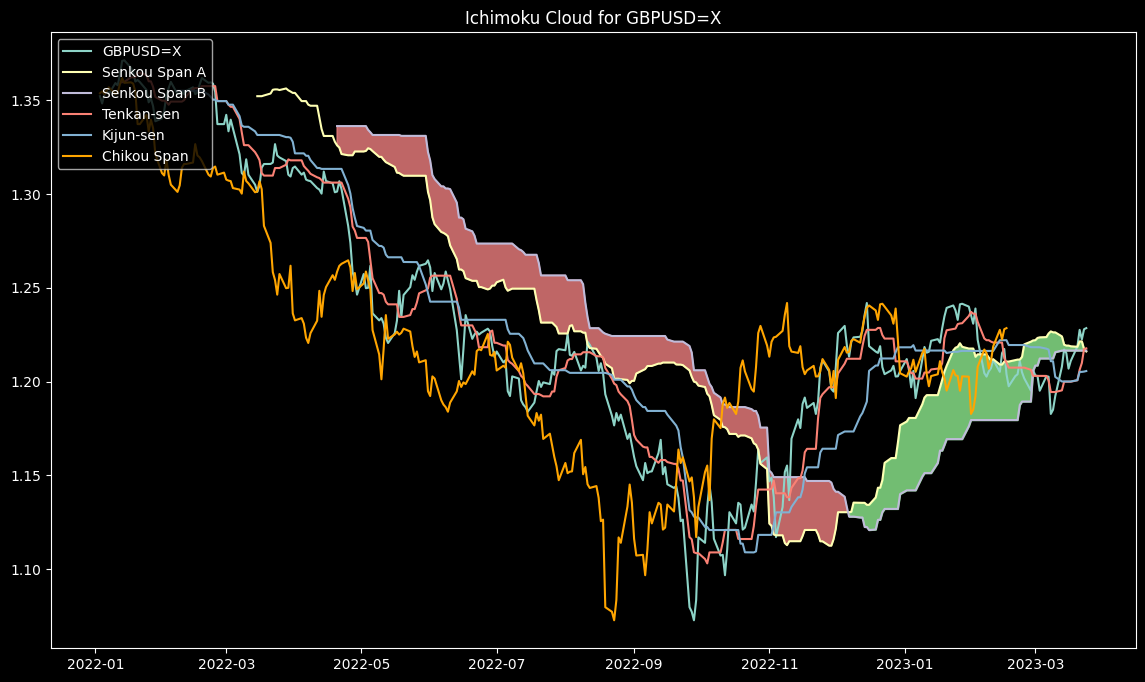

In [26]:
""" FOREX MARKETS """

# def fetch_stock_data(ticker, start_date, end_date):
#     stock_data = yf.download(ticker, start=start_date, end=end_date)
#     return stock_data

def fetch_forex_data(forex_pair, start_date, end_date):
    forex_data = yf.download(forex_pair, start=start_date, end=end_date, group_by='ticker')
    forex_data = forex_data.rename(columns={forex_pair: 'Close'})
    forex_data['Open'] = forex_data['Close']
    forex_data['High'] = forex_data['Close']
    forex_data['Low'] = forex_data['Close']
    return forex_data


def calculate_ichimoku(data):
    high_prices = data['High']
    low_prices = data['Low']
    close_prices = data['Close']

    # Ichimoku Cloud calculation
    data['Tenkan-sen'] = (high_prices.rolling(window=9).max() + low_prices.rolling(window=9).min()) / 2
    data['Kijun-sen'] = (high_prices.rolling(window=26).max() + low_prices.rolling(window=26).min()) / 2
    data['Senkou Span A'] = ((data['Tenkan-sen'] + data['Kijun-sen']) / 2).shift(26)
    data['Senkou Span B'] = ((high_prices.rolling(window=52).max() + low_prices.rolling(window=52).min()) / 2).shift(26)
    data['Chikou Span'] = close_prices.shift(-26)

    return data

def plot_ichimoku(data, ticker):
    plt.figure(figsize=(14, 8))
    plt.plot(data.index, data['Close'], label=ticker)
    plt.plot(data.index, data['Senkou Span A'], label='Senkou Span A')
    plt.plot(data.index, data['Senkou Span B'], label='Senkou Span B')
    plt.plot(data.index, data['Tenkan-sen'], label='Tenkan-sen')
    plt.plot(data.index, data['Kijun-sen'], label='Kijun-sen')
    plt.plot(data.index, data['Chikou Span'], label='Chikou Span', color='orange')
    plt.fill_between(data.index, data['Senkou Span A'], data['Senkou Span B'], where=data['Senkou Span A']>=data['Senkou Span B'], color='lightgreen', alpha=0.8)
    plt.fill_between(data.index, data['Senkou Span A'], data['Senkou Span B'], where=data['Senkou Span A']<data['Senkou Span B'], color='lightcoral', alpha=0.8)
    plt.legend(loc='upper left')
    plt.title('Ichimoku Cloud for ' + ticker)
    plt.show()

if __name__ == '__main__':
    forex_pair = 'GBPUSD=X'
    start_date = '2022-01-01'
    end_date = '2023-04-01'
    forex_data = fetch_forex_data(forex_pair, start_date, end_date)
    ichimoku_data = calculate_ichimoku(forex_data)
    plot_ichimoku(ichimoku_data, forex_pair)


| END OF PROGRAM |
|----------------|